In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import PredictionErrorDisplay


In [3]:
df=pd.read_csv('merged_data.csv')
df

,timeopen,timeclose,btc_open,btc_high,btc_low,btc_close,btc_vol,eth_open,eth_high,eth_low,eth_close,eth_vol,sol_open,sol_high,sol_low,sol_close,sol_vol
0,2023-09-28,2023-09-28 23:59:59,26355.812395,27259.499223,26327.321712,27021.546765,1.407900e+10,1597.672008,1666.024139,1597.294728,1652.882746,6.658092e+09,1597.672008,1666.024139,1597.294728,1652.882746,6.658092e+09
1,2023-09-29,2023-09-29 23:59:59,27024.841714,27225.938430,26721.762797,26911.721603,1.039644e+10,1652.999878,1687.281250,1648.656516,1667.943833,5.529688e+09,1652.999878,1687.281250,1648.656516,1667.943833,5.529688e+09
2,2023-09-30,2023-09-30 23:59:59,26911.689185,27091.795508,26888.967804,26967.916301,5.331173e+09,1667.834491,1692.531165,1666.563877,1671.161811,3.155292e+09,1667.834491,1692.531165,1666.563877,1671.161811,3.155292e+09
3,2023-10-01,2023-10-01 23:59:59,26967.397433,28047.237710,26965.094292,27983.750382,9.503917e+09,1671.161528,1750.595723,1670.082182,1733.810478,5.054880e+09,1671.161528,1750.595723,1670.082182,1733.810478,5.054880e+09
4,2023-10-02,2023-10-02 23:59:59,27976.799152,28494.459638,27347.787580,27530.784890,1.979304e+10,1732.984005,1743.563581,1646.077697,1663.627529,8.420553e+09,1732.984005,1743.563581,1646.077697,1663.627529,8.420553e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2024-10-27,2024-10-27 23:59:59,67023.479419,68221.314741,66847.223100,67929.298796,1.672131e+10,2479.937120,2523.171338,2462.271938,2505.940664,9.801435e+09,2479.937120,2523.171338,2462.271938,2505.940664,9.801435e+09
396,2024-10-28,2024-10-28 23:59:59,67922.674273,70212.269041,67535.131013,69907.754674,3.879986e+10,2505.590509,2587.430142,2470.268340,2565.348033,1.897184e+10,2505.590509,2587.430142,2470.268340,2565.348033,1.897184e+10
397,2024-10-29,2024-10-29 23:59:59,69910.045366,73577.209658,69729.917830,72720.493575,5.854187e+10,2565.417849,2680.054530,2560.153826,2637.957581,2.218585e+10,2565.417849,2680.054530,2560.153826,2637.957581,2.218585e+10
398,2024-10-30,2024-10-30 23:59:59,72715.366485,72905.298520,71411.735034,72339.542181,4.064664e+10,2637.640108,2720.271436,2600.609657,2657.372557,2.238269e+10,2637.640108,2720.271436,2600.609657,2657.372557,2.238269e+10


In [4]:
df['timeopen'] = pd.to_datetime(df['timeopen'])
df['timeclose'] = pd.to_datetime(df['timeclose'])

In [9]:
df.corr()

,timeopen,timeclose,btc_open,btc_high,btc_low,btc_close,btc_vol,eth_open,eth_high,eth_low,eth_close,eth_vol,sol_open,sol_high,sol_low,sol_close,sol_vol
timeopen,1.000000,1.000000,0.795647,0.792973,0.801049,0.794599,0.272812,0.454983,0.451924,0.452420,0.447379,0.324617,0.454983,0.451924,0.452420,0.447379,0.324617
timeclose,1.000000,1.000000,0.795647,0.792973,0.801049,0.794599,0.272812,0.454983,0.451924,0.452420,0.447379,0.324617,0.454983,0.451924,0.452420,0.447379,0.324617
btc_open,0.795647,0.795647,1.000000,0.996688,0.995770,0.993245,0.445697,0.860487,0.858854,0.852297,0.851066,0.488233,0.860487,0.858854,0.852297,0.851066,0.488233
btc_high,0.792973,0.792973,0.996688,1.000000,0.994949,0.997662,0.474033,0.857661,0.861783,0.852142,0.855730,0.505377,0.857661,0.861783,0.852142,0.855730,0.505377
btc_low,0.801049,0.801049,0.995770,0.994949,1.000000,0.996571,0.398043,0.853009,0.853391,0.854336,0.851726,0.440821,0.853009,0.853391,0.854336,0.851726,0.440821
btc_close,0.794599,0.794599,0.993245,0.997662,0.996571,1.000000,0.443629,0.852509,0.857495,0.852572,0.856659,0.476895,0.852509,0.857495,0.852572,0.856659,0.476895
btc_vol,0.272812,0.272812,0.445697,0.474033,0.398043,0.443629,1.000000,0.411766,0.440304,0.355392,0.403530,0.901291,0.411766,0.440304,0.355392,0.403530,0.901291
eth_open,0.454983,0.454983,0.860487,0.857661,0.853009,0.852509,0.411766,1.000000,0.995354,0.993471,0.989761,0.465857,1.000000,0.995354,0.993471,0.989761,0.465857
eth_high,0.451924,0.451924,0.858854,0.861783,0.853391,0.857495,0.440304,0.995354,1.000000,0.992170,0.996181,0.497927,0.995354,1.000000,0.992170,0.996181,0.497927
eth_low,0.452420,0.452420,0.852297,0.852142,0.854336,0.852572,0.355392,0.993471,0.992170,1.000000,0.994710,0.409296,0.993471,0.992170,1.000000,0.994710,0.409296


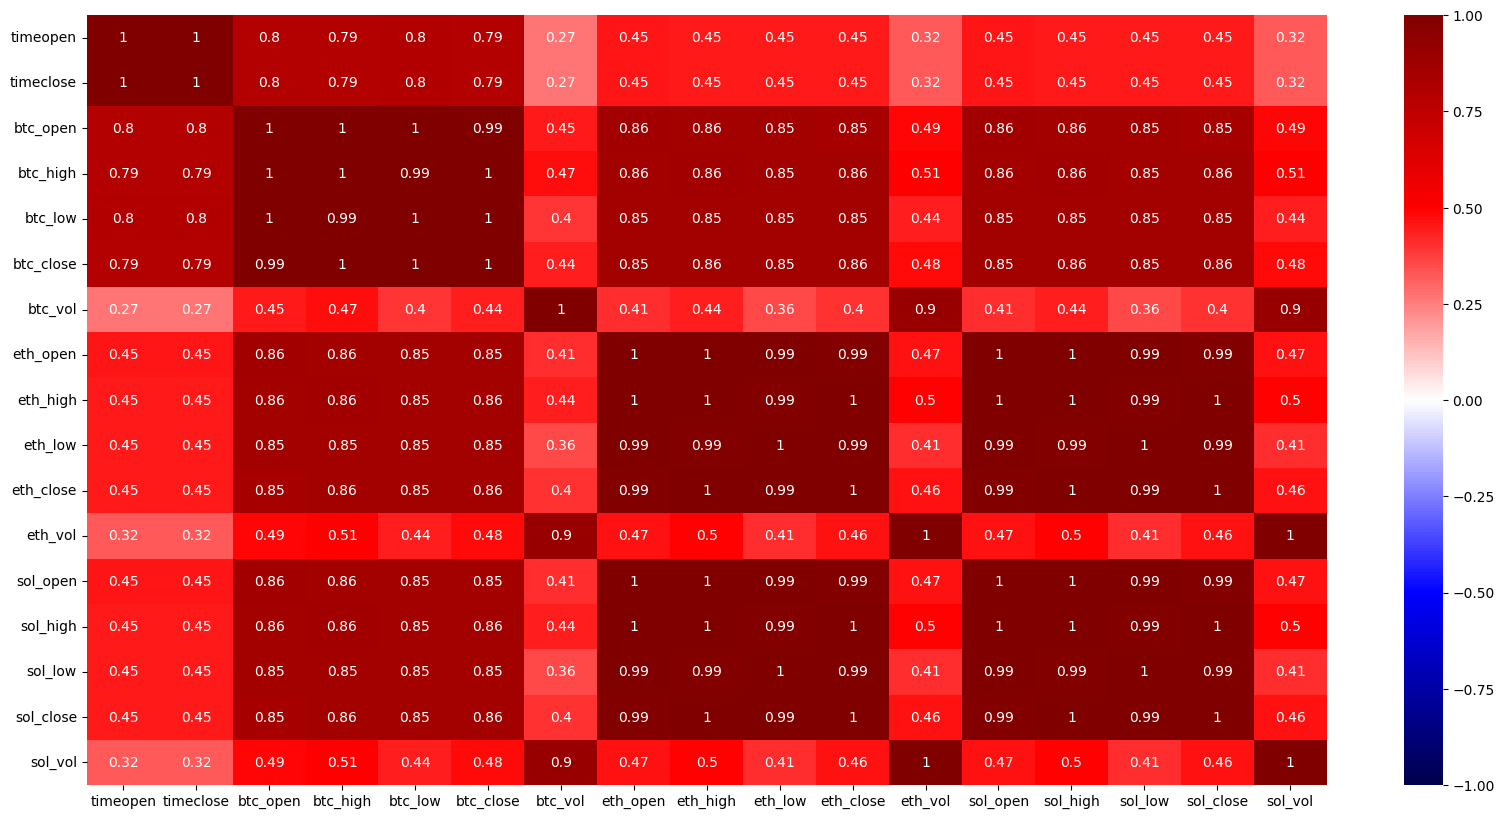

In [10]:
plt.figure(figsize=[20,10])
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

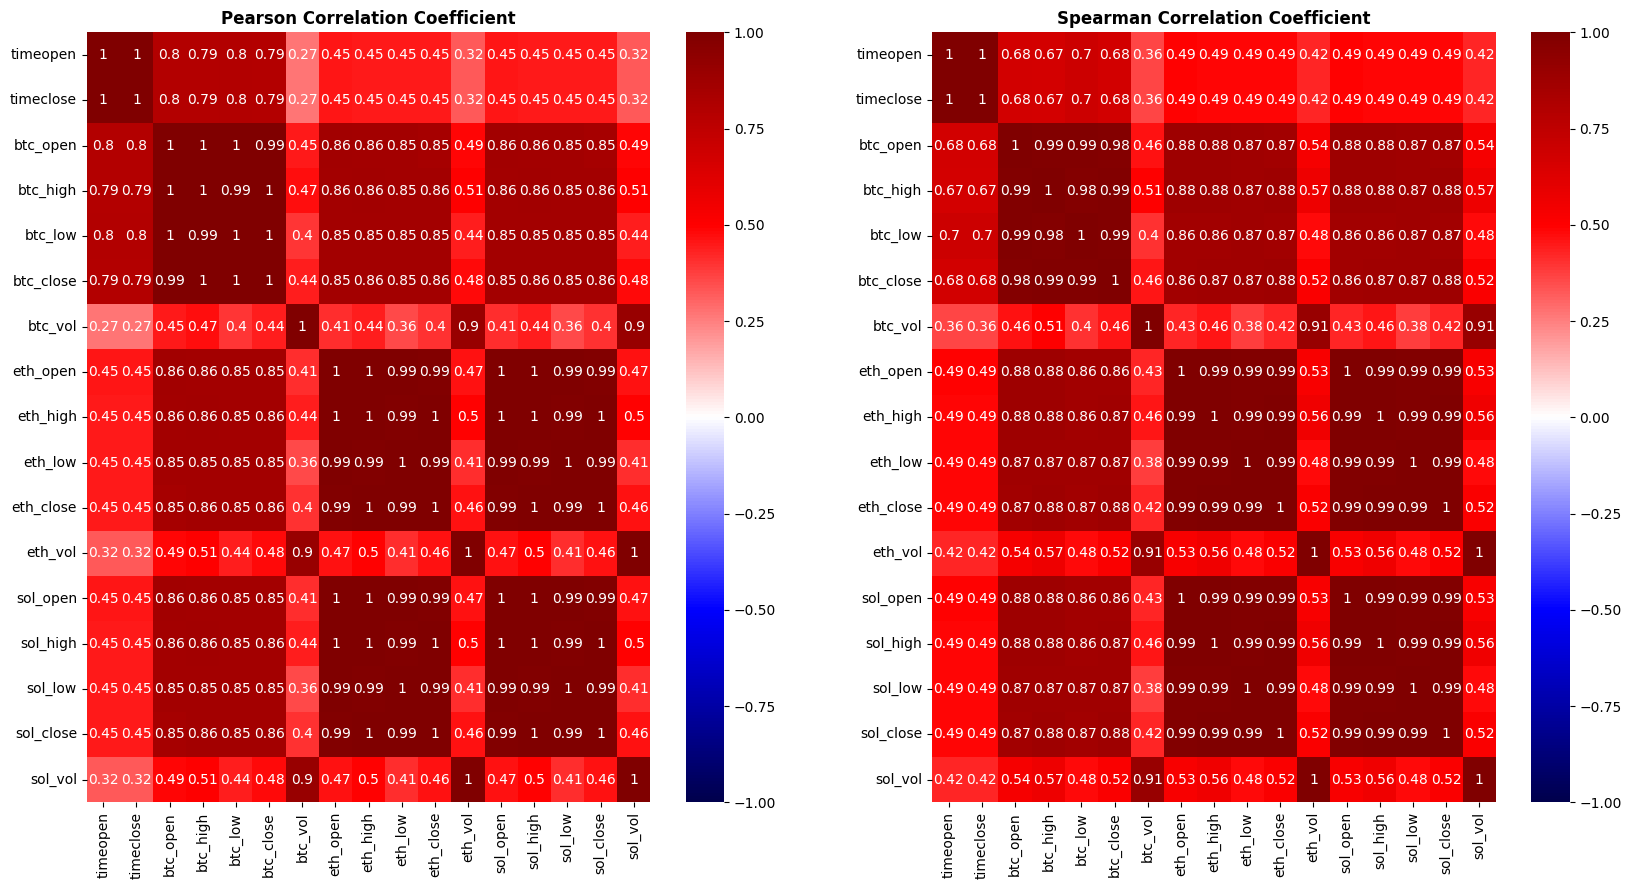

In [11]:
plt.figure(figsize=[20,10])

plt.subplot(1,2,1)
plt.title('Pearson Correlation Coefficient', weight='bold')
sns.heatmap(df.corr(method='pearson'), cmap="seismic", annot=True, vmin=-1, vmax=1);

plt.subplot(1,2,2)
plt.title('Spearman Correlation Coefficient', weight='bold')
sns.heatmap(df.corr(method='spearman'), cmap="seismic", annot=True, vmin=-1, vmax=1);

iki kolerasyonu incelediğimizde hedef değişkenimiz 'sol_close' değeri göz önüne aldığığımızda daha fazla 1 e yakın olduğunu fark ettik. Coin grafiklerinin değişkenliği göz önüne aldığımızda non-lineer olması olası duruyor bu sebeple spearman kullanmayı tercih ediyoruz.

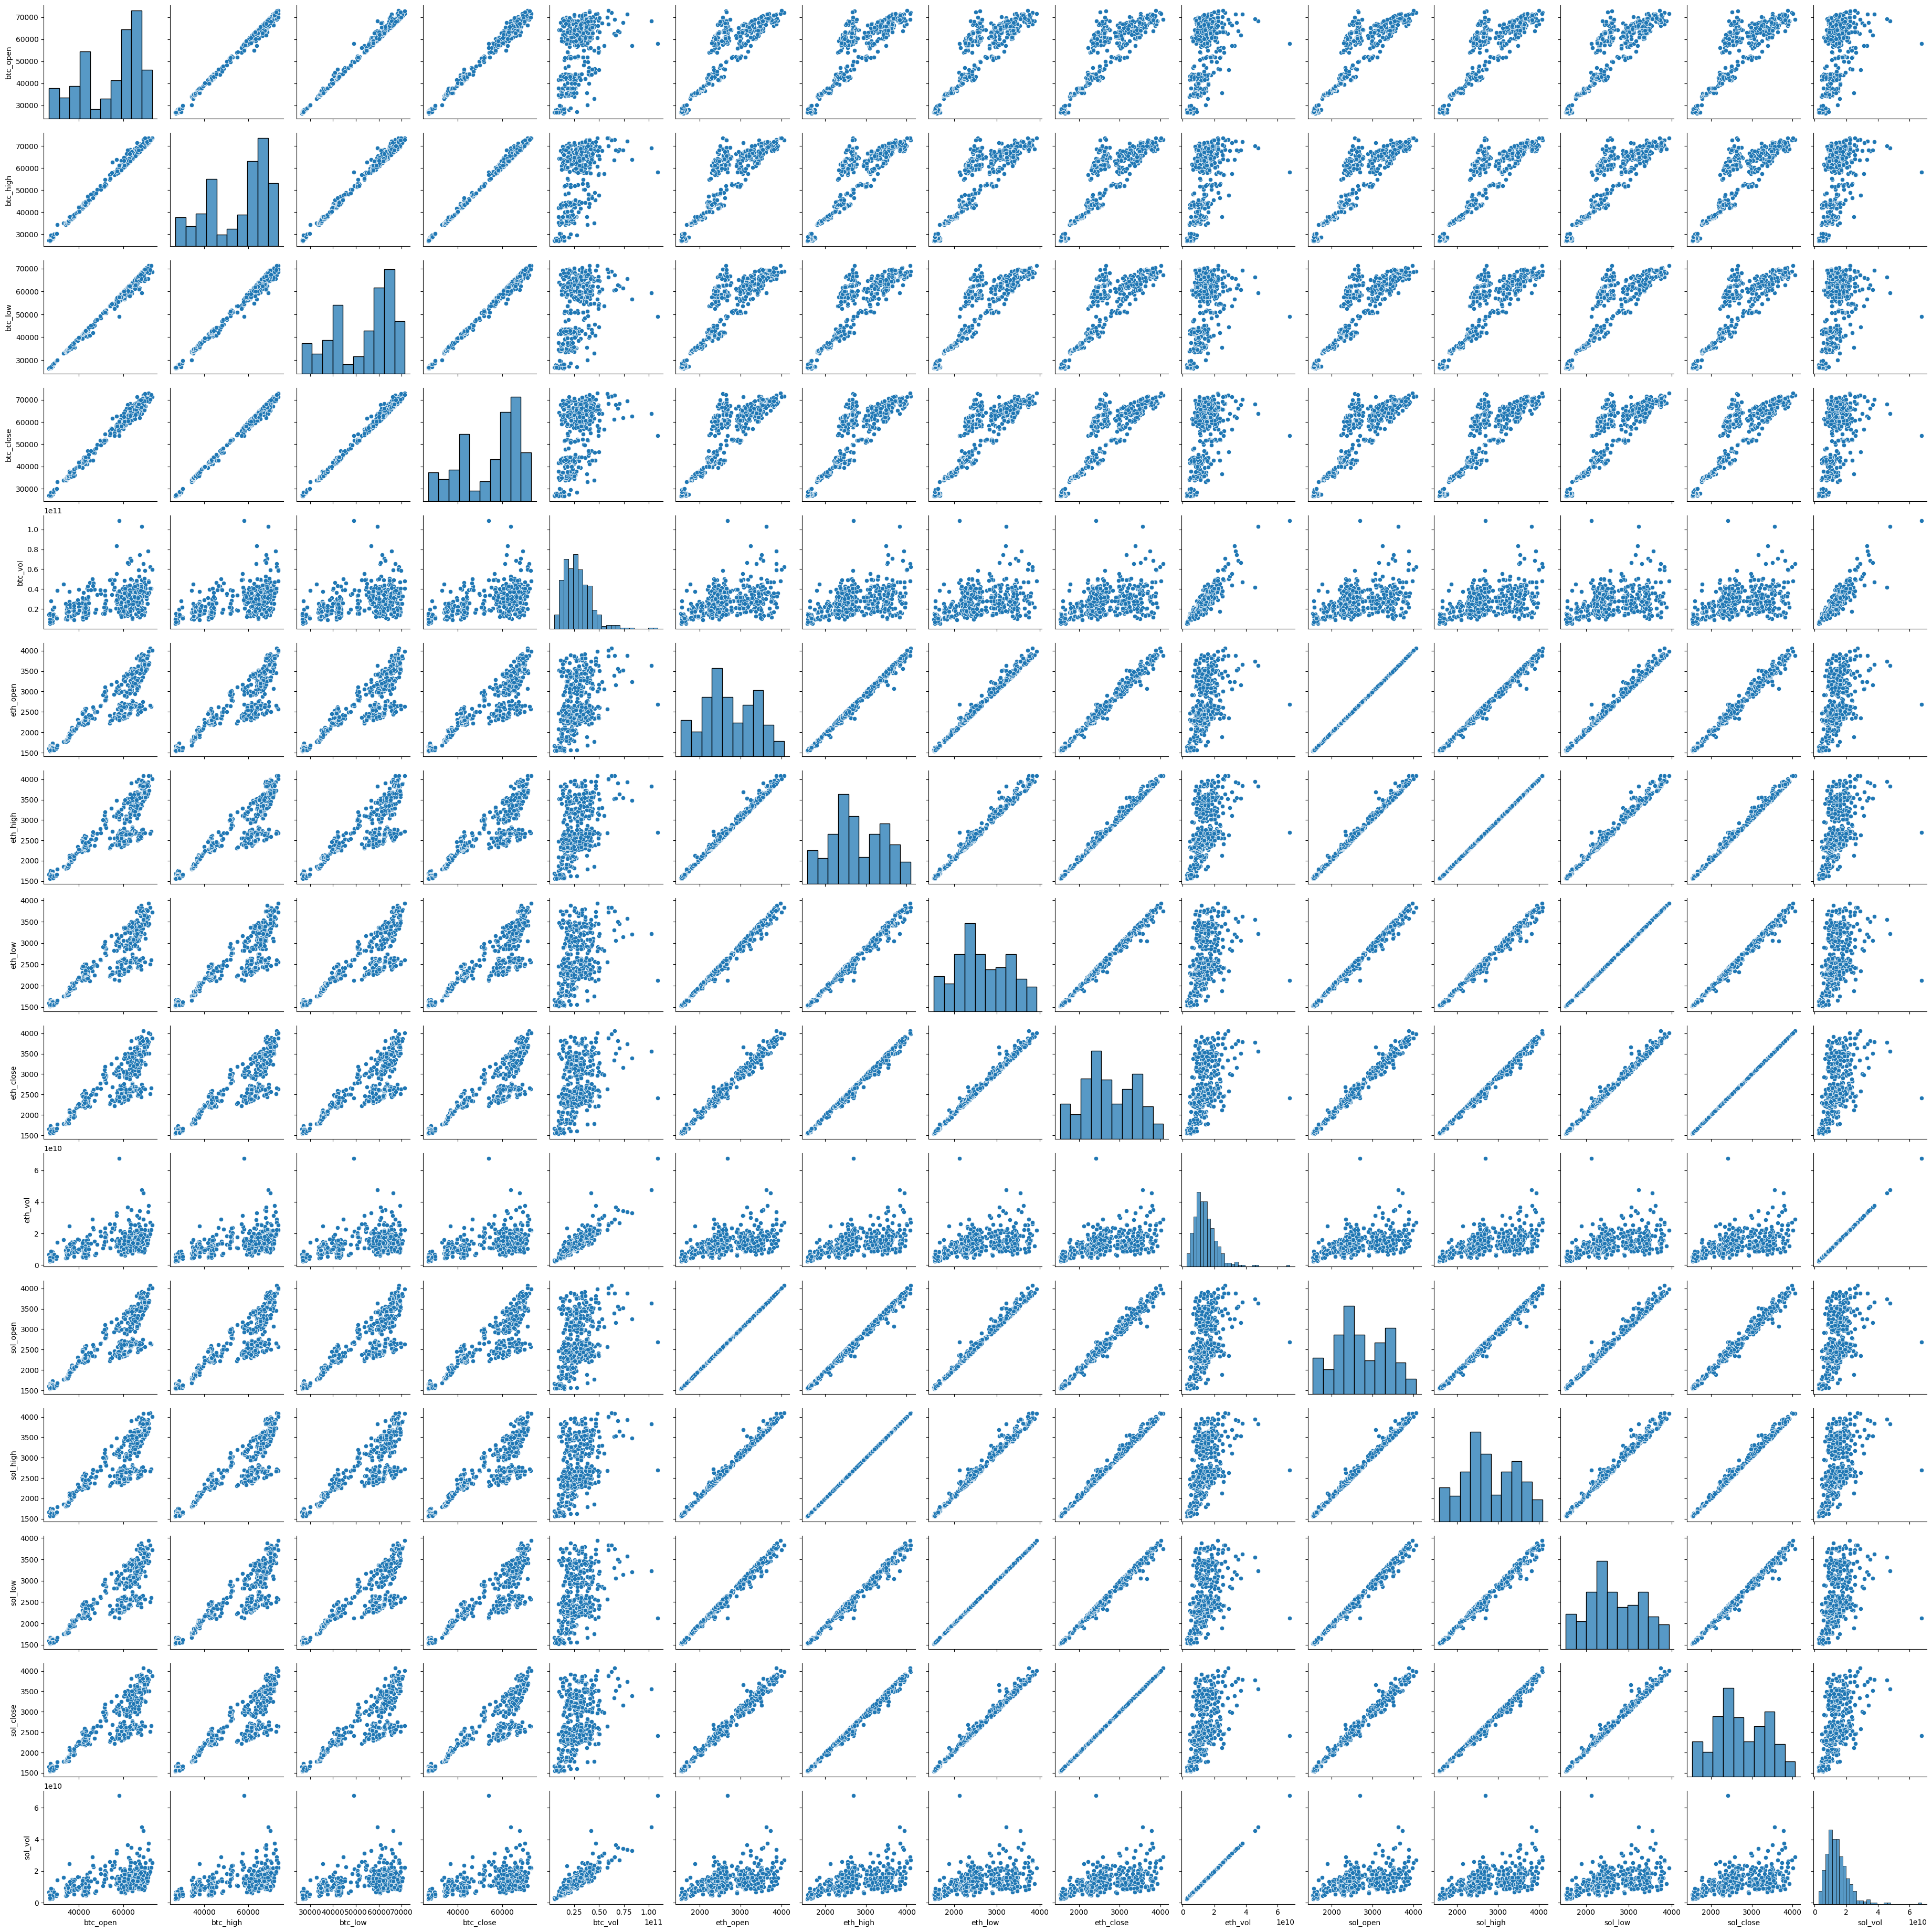

In [17]:
#diyagramlara bakalım neler göreceğiz
sns.pairplot(df);

In [5]:
train=pd.read_csv('train_merged.csv')
test=pd.read_csv('test_merged.csv')

In [6]:
from sklearn.model_selection import train_test_split

# X ve Y değişkenlerimizi oluşturma
X = train.drop(columns=['sol_close','timeopen','timeclose'])
y = train['sol_close']

# Train/Test Ayrımı
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train/Validation Ayrımı
x_train, x_cv, y_train, y_cv = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

print('X Train:', x_train.shape)
print('X Validation:', x_cv.shape)
print('X test:', x_test.shape)

X Train: (240, 14)
X Validation: (80, 14)
X test: (80, 14)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Modeli Oluşturma
lreg = LinearRegression()

# Modeli Eğitim Verisi ile Eğitme
lreg.fit(x_train, y_train)

# Doğrulama Verisi ile Tahmin
pred = lreg.predict(x_cv)

# RMSE Hesabı
print("RMSE:", np.sqrt(mean_squared_error(y_cv, pred)))

# R2 Skor
print("R2 Score:", r2_score(y_cv, pred))

RMSE: 1.3955166989668808e-07
R2 Score: 1.0
